In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import advance_visual,describe,statistic,visual,fe,optimization,maps

%reload_ext autoreload

# Load dataset

In [3]:
df = pd.read_csv(f"raw.csv")

# geolocation data

In [4]:
df

,lead_id,latitude,longitude
0,513kkmsuepx7,-8.302753,113.434242
1,513hf9eaunib,-8.326232,113.413971
2,5134pdhiyir7,-8.337567,113.376735
3,513xmkg57t8f,-8.259259,113.458569
4,514ha59687vd,-8.242028,113.452082
5,5132gcctyvxb,-8.310026,113.378957
6,513dx7u2jcmc,-8.322365,113.514111
7,513ubs6ryp5w,-8.261313,113.472585
8,5135sq7a3w7m,-8.300938,113.441838
9,5133g5yk95kc,-8.323161,113.517558


# add starting point

In [5]:
dist = df[['latitude','longitude']].to_numpy()

In [6]:
dist = np.insert(dist,0,[-8.2549693,113.4364565],axis = 0)

In [7]:
pd.DataFrame(dist)

,0,1
0,-8.254969,113.436457
1,-8.302753,113.434242
2,-8.326232,113.413971
3,-8.337567,113.376735
4,-8.259259,113.458569
5,-8.242028,113.452082
6,-8.310026,113.378957
7,-8.322365,113.514111
8,-8.261313,113.472585
9,-8.300938,113.441838


# calculate distance with Vincenty's formulae

In [8]:
distance = optimization.compute_distances(dist,types='vincenty')

## distance matrix

In [9]:
pd.DataFrame(distance)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0000,5.2904,8.2616,11.2576,2.4820,2.2388,8.7866,11.3465,4.0417,5.1185,...,8.8623,3.4667,3.1255,8.7134,10.8726,2.8264,8.7517,8.3350,5.1085,9.3406
1,5.2904,0.0000,3.4248,7.4131,5.5065,6.9977,6.1431,9.0616,6.2328,0.8605,...,6.1906,5.5708,2.1942,4.0439,7.2361,2.6736,4.5882,4.2762,9.6894,6.5539
2,8.2616,3.4248,0.0000,4.2889,8.8883,10.2154,4.2532,11.0392,9.6563,4.1532,...,4.2595,8.9953,5.4264,4.8478,4.2704,5.4354,1.6693,1.6400,11.8257,4.4134
3,11.2576,7.4131,4.2889,0.0000,12.5011,13.4368,3.0558,15.2255,13.5135,8.2366,...,2.9839,12.8104,9.0093,8.9533,0.5772,8.6078,2.8257,3.1516,13.4630,2.6070
4,2.4820,5.5065,8.8883,12.5011,0.0000,2.0353,10.4138,9.2817,1.5608,4.9644,...,10.4835,1.0282,3.5111,7.9182,12.2002,3.9837,9.7772,9.3941,7.2078,10.9430
5,2.2388,6.9977,10.2154,13.4368,2.0353,0.0000,11.0208,11.2090,3.1067,6.6123,...,11.0961,2.9107,4.8238,9.8431,13.0689,4.8693,10.8594,10.4505,5.5846,11.5736
6,8.7866,6.1431,4.2532,3.0558,10.4138,11.0208,0.0000,14.9506,11.6369,6.9995,...,0.0791,10.9115,7.1133,8.9784,2.5056,6.4314,2.7307,2.6208,10.4624,0.5593
7,11.3465,9.0616,11.0392,15.2255,9.2817,11.2090,14.9506,0.0000,8.1559,8.3066,...,14.9827,8.3092,9.4717,6.2804,15.2862,10.5672,12.6942,12.5674,16.4116,15.2604
8,4.0417,6.2328,9.6563,13.5135,1.5608,3.1067,11.6369,8.1559,0.0000,5.5389,...,11.7030,0.7266,4.5475,7.8625,13.2586,5.2470,10.7258,10.3680,8.6044,12.1483
9,5.1185,0.8605,4.1532,8.2366,4.9644,6.6123,6.9995,8.3066,5.5389,0.0000,...,7.0478,4.9084,2.0149,3.7430,8.0753,2.8115,5.4113,5.1132,9.7985,7.4136


## calculate TSP

In [10]:
optimization.tsp(data=pd.DataFrame(distance), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,33.2567,"[[0, 19], [1, 9], [2, 14], [3, 15], [4, 5], [6..."
1,1,45.3245,"[[0, 5, 19], [1, 16, 13, 9], [2, 17, 18], [3, ..."
2,2,52.2537,"[[0, 16, 13, 1, 9, 14, 7, 10, 8, 12, 4, 5, 19]..."
3,3,53.7198,"[[0, 16, 13, 9, 1, 2, 14, 7, 10, 8, 12, 4, 5, ..."
4,4,53.8498,"[[0, 16, 13, 9, 1, 18, 17, 2, 14, 7, 10, 8, 12..."
5,5,55.4573,"[[0, 16, 13, 9, 1, 6, 11, 20, 15, 3, 17, 18, 2..."


In [11]:
res_1 = optimization.tsp(data=pd.DataFrame(distance), get='run',sources=[None,None],n=13,seed=19)
res_1

,Nodes,Distance,Cumulative
0,0,0.0000,0.0000
1,16,2.8264,2.8264
2,13,1.0977,3.9241
3,9,2.0149,5.9390
4,1,0.8605,6.7995
5,6,6.1431,12.9426
6,11,0.0791,13.0217
7,20,0.4813,13.5030
8,15,2.0391,15.5421
9,3,0.5772,16.1193


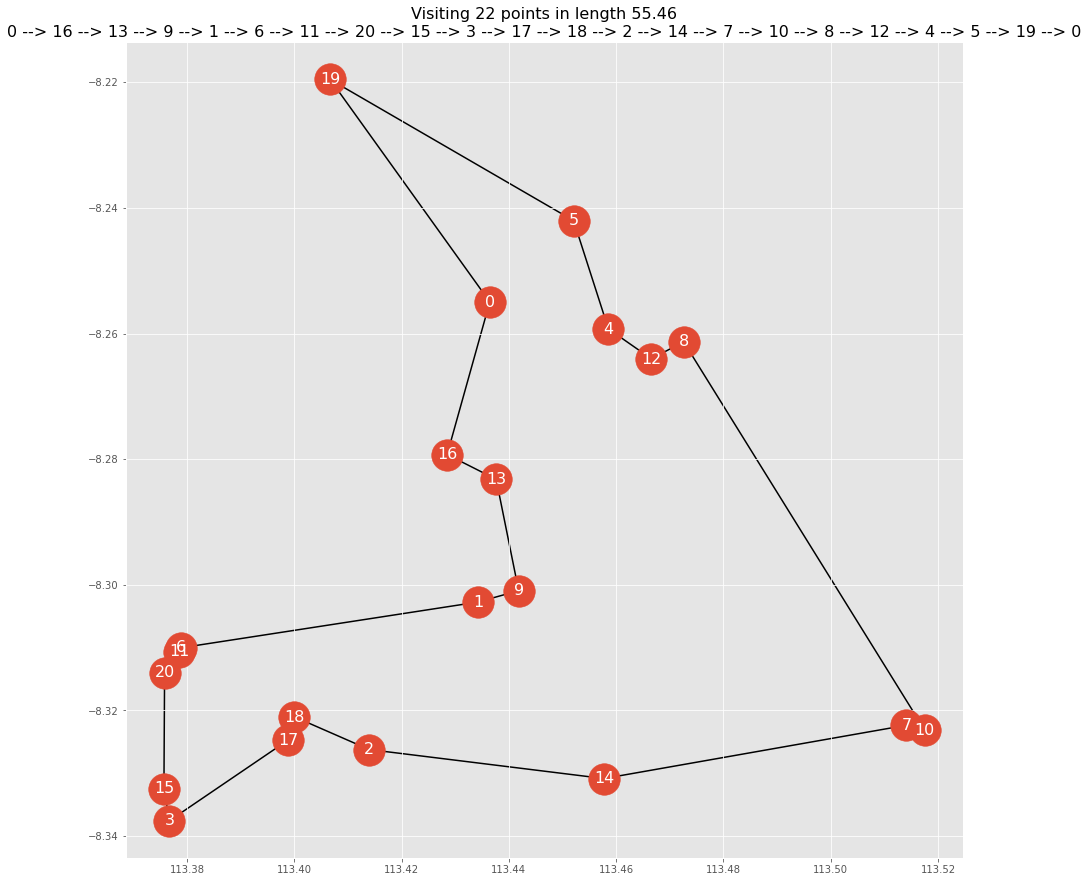

In [12]:
optimization.loc_result(dist,res_1['Nodes'],res_1['Cumulative'][len(res_1)-1])

# get the distance from Openstreetmap.org

In [13]:
distance,duration,geometry = optimization.compute_distances(dist,types='osrm_path')

## distance matrix

In [14]:
pd.DataFrame(distance)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0000,7.9239,14.0607,16.7534,3.2721,2.9883,14.6748,16.5767,4.7967,6.9106,...,14.6936,4.4923,5.8818,12.1498,16.6688,4.9447,13.3941,12.5773,8.7084,15.2042
1,7.9239,0.0000,3.8340,9.3682,8.2712,9.7513,8.3674,10.2695,12.5064,1.0133,...,8.3486,7.3831,2.7274,5.8206,9.2836,3.5719,6.0089,5.1922,16.5433,8.7252
2,14.0607,3.8340,0.0000,6.2581,14.1113,15.5914,5.2573,13.3313,15.5682,5.0561,...,5.2385,15.8809,6.7286,8.8824,6.1735,9.3937,2.4141,3.9479,15.2991,5.6151
3,16.7534,9.3682,6.2581,0.0000,16.8039,18.2840,5.5220,18.8655,18.7033,10.5903,...,5.5032,17.9318,12.2628,14.4166,0.6544,12.0864,4.0408,4.2210,17.9917,5.1372
4,3.2721,8.2712,14.1113,16.8039,0.0000,3.6453,14.7254,14.9797,1.8026,6.9611,...,14.7442,1.4982,5.9323,14.9451,16.7194,4.9953,13.4447,12.6279,11.7466,15.2547
5,2.9883,9.7513,15.5914,18.2840,3.6453,0.0000,16.2182,18.3469,5.1699,8.4540,...,16.2370,4.8655,7.4252,13.6932,18.2122,6.4881,14.9375,14.1208,7.1686,16.7476
6,14.6748,8.3674,5.2573,5.5220,14.7254,16.2182,0.0000,17.8647,16.6247,9.5895,...,0.0188,15.8532,11.7375,13.4158,5.4374,10.0078,3.0399,3.2202,11.6839,0.8978
7,16.5767,10.2695,13.3313,18.8655,14.9797,18.3469,17.8647,0.0000,13.1688,9.6881,...,17.8459,13.4815,12.3226,8.2664,18.7809,13.1671,15.5062,14.6894,26.0406,18.2225
8,4.7967,12.5064,15.5682,18.7033,1.8026,5.1699,16.6247,13.1688,0.0000,7.1413,...,16.6435,0.7715,6.1336,13.1342,18.6187,6.8946,15.3440,14.5272,13.2713,17.1541
9,6.9106,1.0133,5.0561,10.5903,6.9611,8.4540,9.5895,9.6881,7.1413,0.0000,...,9.5707,6.3698,2.6451,5.2392,10.5057,3.4896,7.2310,6.4142,17.7654,9.9473


In [15]:
pd.DataFrame(duration)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,922.6,977.1,1572.5,312.6,440.8,1285.0,1725.3,539.2,774.2,...,1287.7,483.3,586.4,1419.7,1570.3,410.7,1092.7,967.9,822.7,1366.1
1,922.6,0.0,314.3,1071.9,916.5,1182.8,928.0,1022.6,942.5,151.7,...,925.3,892.1,405.1,689.5,1069.7,524.3,592.1,467.3,1282.4,987.0
2,977.1,314.3,0.0,911.8,972.8,1239.1,767.9,1156.1,1076.0,391.5,...,765.2,1087.3,682.5,823.0,909.6,677.9,353.9,388.5,1203.6,826.9
3,1572.5,1071.9,911.8,0.0,1570.8,1837.1,807.6,1916.0,1790.3,1151.4,...,804.9,1704.4,1442.4,1582.9,96.4,1275.9,599.6,623.1,1801.6,759.7
4,312.6,916.5,972.8,1570.8,0.0,511.0,1286.2,1506.3,277.3,775.4,...,1288.9,221.4,587.6,1305.7,1571.5,411.9,1093.9,969.1,1104.7,1367.3
5,440.8,1182.8,1239.1,1837.1,511.0,0.0,1555.4,1961.8,732.8,1044.6,...,1558.1,676.9,856.8,1690.1,1840.7,681.1,1363.1,1238.3,969.4,1636.5
6,1285.0,928.0,767.9,807.6,1286.2,1555.4,0.0,1770.6,1495.3,1006.0,...,2.7,1409.4,1171.7,1437.5,797.4,980.9,454.2,477.7,1278.0,138.6
7,1725.3,1022.6,1156.1,1916.0,1506.3,1961.8,1770.6,0.0,1268.5,973.9,...,1766.6,1279.8,1318.8,999.1,1911.0,1438.0,1433.4,1308.6,2123.7,1828.3
8,539.2,942.5,1076.0,1790.3,277.3,732.8,1495.3,1268.5,0.0,830.3,...,1504.4,87.0,711.0,1079.3,1787.0,627.4,1309.4,1184.6,1322.8,1582.8
9,774.2,151.7,391.5,1151.4,775.4,1044.6,1006.0,973.9,830.3,0.0,...,1000.2,740.4,401.7,645.5,1144.6,520.9,667.0,542.2,1357.3,1061.9


In [16]:
pd.DataFrame(geometry)

,city1,city2,path
0,0,0,"[[113.436236, -8.254965], [113.436236, -8.2549..."
1,0,1,"[[113.436236, -8.254965], [113.436229, -8.2553..."
2,0,2,"[[113.436236, -8.254965], [113.436229, -8.2553..."
3,0,3,"[[113.436236, -8.254965], [113.436229, -8.2553..."
4,0,4,"[[113.436236, -8.254965], [113.436229, -8.2553..."
...,...,...,...
226,18,19,"[[113.400009, -8.321055], [113.399843, -8.3209..."
227,18,20,"[[113.400009, -8.321055], [113.399843, -8.3209..."
228,19,19,"[[113.40672, -8.219457], [113.40672, -8.219457]]"
229,19,20,"[[113.40672, -8.219457], [113.40673, -8.21946]..."


## calculate TSP

In [17]:
optimization.tsp(data=pd.DataFrame(distance), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,48.7063,"[[0, 4], [1, 14, 9], [2, 17, 18], [3, 15], [5,..."
1,1,67.4120,"[[0, 19, 5], [1, 9, 13, 16], [2, 17], [3, 20, ..."
2,2,77.6376,"[[0, 5, 19, 16, 13, 1, 9, 14, 7, 10, 8, 12, 4]..."
3,3,78.2421,"[[0, 4, 8, 12, 13, 16, 19, 5], [1, 2], [3, 20,..."
4,4,80.4011,"[[0, 4, 12, 8, 10, 7, 14, 2, 1, 9, 13, 16, 19,..."
5,5,80.5430,"[[0, 4, 8, 12, 16, 13, 9, 10, 7, 14, 1, 2, 17,..."


In [18]:
res_1 = optimization.tsp(data=pd.DataFrame(distance), get='run',sources=[None,None],n=13,seed=19)
res_1

,Nodes,Distance,Cumulative
0,0,0.0000,0.0000
1,4,3.2721,3.2721
2,8,1.8026,5.0747
3,12,0.7715,5.8462
4,16,6.1231,11.9693
5,13,1.4959,13.4652
6,9,2.6451,16.1103
7,10,10.1098,26.2201
8,7,0.4217,26.6418
9,14,8.2664,34.9082


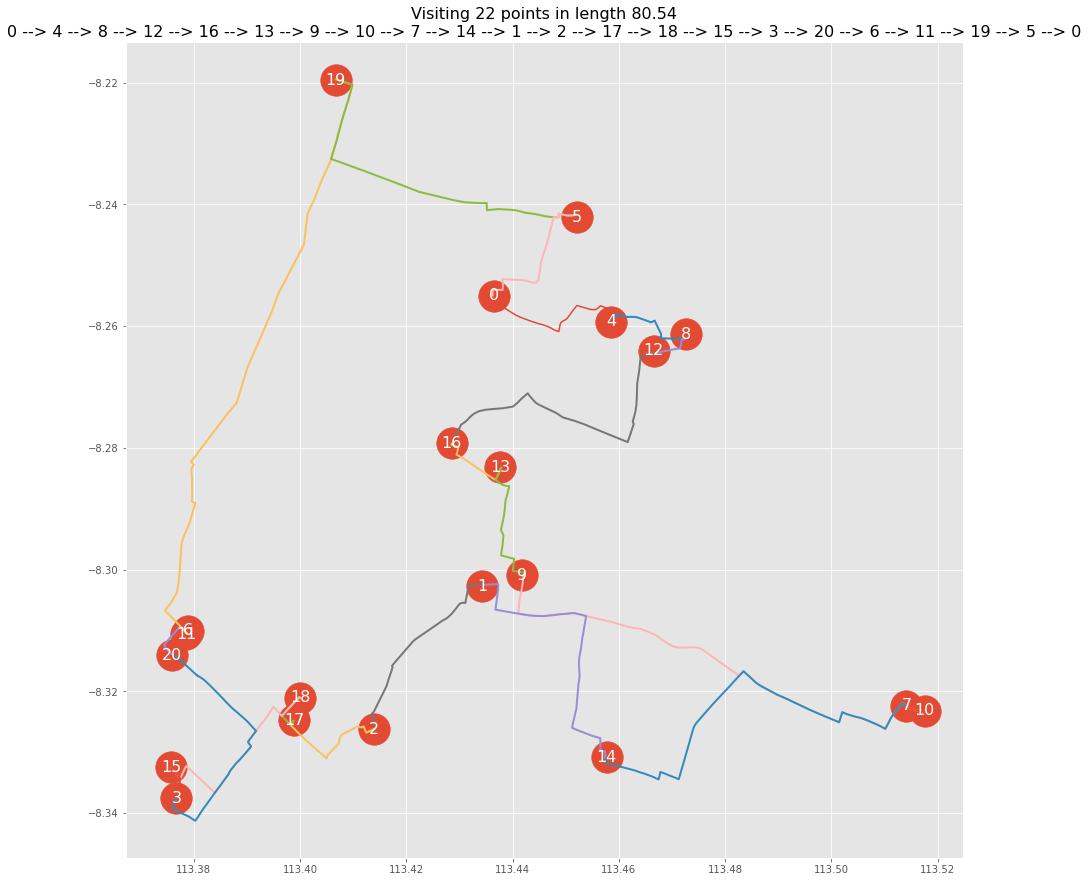

In [19]:
optimization.loc_path_result(dist,res_1['Nodes'],res_1['Cumulative'][len(res_1)-1],geometry)

In [20]:
from ipywidgets import HTML
from ipyleaflet import Map,Marker,basemaps,Polyline,Polygon,ScaleControl
from ipyleaflet import Icon,AwesomeIcon,Popup,Rectangle,Circle
m = maps.map_marker_plot(df,
                     ['lead_id','latitude',"longitude"],-8.259259,113.458569,geometry=geometry,zoom=13,route=res_1['Nodes'],
                     popup=True,notes=False,names="testings")
m.layout.height="1000px"
message = HTML(value=f"point jember <br> lon:{np.round(113.4364565,2)} | lat:{np.round(-8.2549693,2)}")
# icon = AwesomeIcon(name=icon, marker_color='blue', icon_color='darkgreen')
marker = Marker(location=(-8.2549693,113.4364565), draggable=False)
marker.popup = message
m.add_layer(marker)
m

Map(center=[-8.259259, 113.458569], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [21]:
dff3 = pd.DataFrame(np.insert(df.values, 0, values=["-", -8.2549693,113.4364565], axis=0))

#define column names of DataFrame
dff3.columns = df.columns

In [22]:
import folium
laMap = maps.map_marker_fol_plot(dff3,shape=None,col_list=['latitude','longitude'],
                         center_coor=[-8.259259,113.458569],marker='point_number', 
                         tip=["lead_id","latitude","longitude"],geometry=geometry,route=res_1['Nodes'],zoom=13)
folium.Marker((-8.2549693,113.4364565), tooltip='point jember').add_to(laMap)
laMap

In [23]:
laMap.save(f'jember.html')

# Vehicle Routing Problem

## with 4 vehicles with almost same cumulative distance

In [24]:
data = optimization.data_model_or(distance,num_vehicles=4)

In [25]:
pd.DataFrame(data['distance_matrix'])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,8,14,17,3,3,15,17,5,7,...,15,4,6,12,17,5,13,13,9,15
1,8,0,4,9,8,10,8,10,13,1,...,8,7,3,6,9,4,6,5,17,9
2,14,4,0,6,14,16,5,13,16,5,...,5,16,7,9,6,9,2,4,15,6
3,17,9,6,0,17,18,6,19,19,11,...,6,18,12,14,1,12,4,4,18,5
4,3,8,14,17,0,4,15,15,2,7,...,15,1,6,15,17,5,13,13,12,15
5,3,10,16,18,4,0,16,18,5,8,...,16,5,7,14,18,6,15,14,7,17
6,15,8,5,6,15,16,0,18,17,10,...,0,16,12,13,5,10,3,3,12,1
7,17,10,13,19,15,18,18,0,13,10,...,18,13,12,8,19,13,16,15,26,18
8,5,13,16,19,2,5,17,13,0,7,...,17,1,6,13,19,7,15,15,13,17
9,7,1,5,11,7,8,10,10,7,0,...,10,6,3,5,11,3,7,6,18,10


In [26]:
res = optimization.vrp_or(data)

[0, 17, 15, 3, 18, 0]
[0, 19, 5, 8, 12, 4, 0]
[0, 9, 14, 7, 10, 0]
[0, 20, 11, 6, 2, 1, 13, 16, 0]


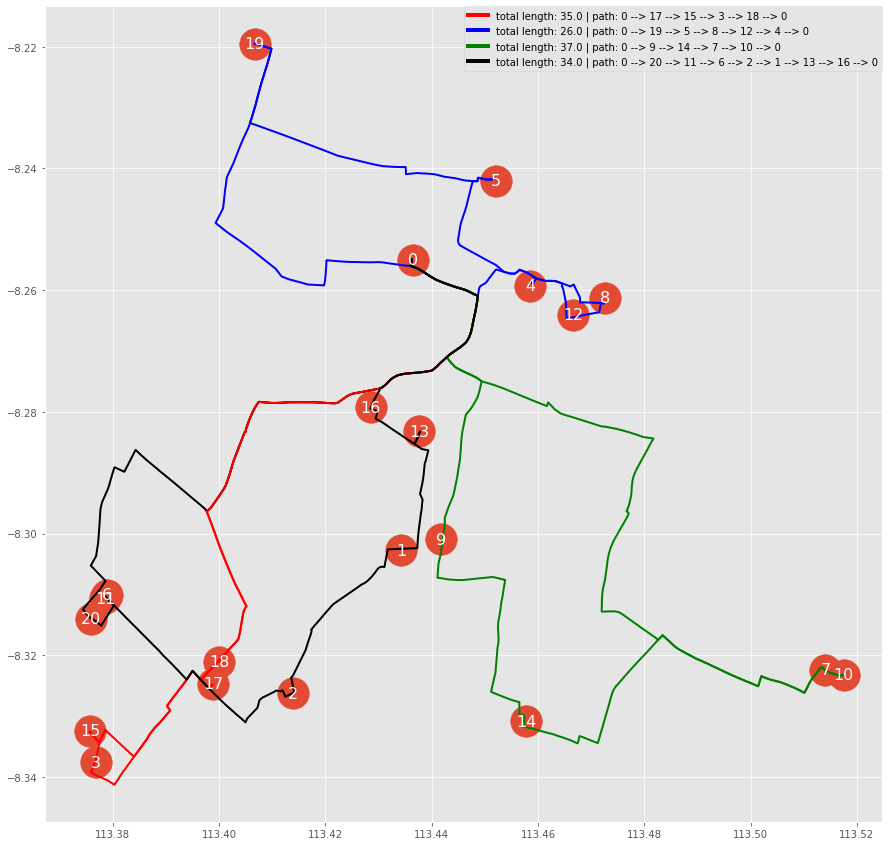

In [27]:
optimization.loc_vrp_result(dist,res,geometry)